<span style='font-size: 2.0em'><b>Processamento de Linguagem Natural ü§ñ</b></span><br/>

    
<span style='font-size: 1.0em'><b>Rafael Vieira - RU: 3534345 - Ci√™ncia de Dados<b></span>
</p>

## üíªüóíÔ∏è  Composi√ß√£o do Notebook:
<table align="left" class='dashed-box'>

<tr style="background-color: white !important">
<td>
    
    
<b><i> 1 - Introdu√ß√£o:</i></b> Defini√ß√£o breve do trabalho

<b><i>2 - Informa√ß√µes sobre os dados:</i></b> Obten√ß√£o e triagem explorat√≥ria inicial
    
<b><i>3 - Pr√©-Processamento:</i></b> Constru√ß√£o do algoritmo utilizando a biblioteca NLTK

<b><i>4 - Visualiza√ß√£o dos dados :</i></b> Constru√ß√£o de Word Cloud (Nuvens de palavras) 
    
<b><i>5 - Modelo Classificat√≥rio:</i></b> Proposta de arquitetura de rede neural para classifica√ß√£o dos dados;
        
<b><i>6 - Arquitetura da rede neural utilizada :</i></b> Apresenta√ß√£o da arquitetura para classifica√ß√£o das not√≠cias 
    
<b><i>6 - Gr√°ficos de desempenho do modelo:</i></b> tabela que estabelece estat√≠sticas relevantes aos gols marcados na copa;
    
<b><i>7 - Discuss√£o final:</i></b> Apresenta√ß√£o das considera√ß√µes finais
</td>
    <td></td>
</tr>
</table><br/><br/><br/><br


### üö¶ 1 - Introdu√ß√£o 
Este notebook contempla a resolu√ß√£o do trabalho final da disciplina de **Natural Processing Learning**, ofertada pela UNINTER. A proposta de tal atividade √© realizar uma an√°lise de sentimento visando a constru√ß√£o de um modelo classificat√≥rio utilizando uma arquitetura de rede neural artificial, que permita inserir o r√≥tulo adequado a um documento, categorizando-o em *not√≠cia fake* ou *real*
</p>

#### üñ•  Escopo do trabalho

Com a busca do termo "Fake News" no Google, encontra-se a seguinte publica√ß√£o para o tema:
"Fake News s√£o not√≠cias falsas publicadas por ve√≠culos de comunica√ß√£o como se fossem informa√ß√µes reais. Esse tipo de texto, em sua maior parte, √© feito e divulgado com o objetivo de legitimar um ponto de vista ou prejudicar uma pessoa ou grupo (geralmente figuras p√∫blicas).

As Fake News t√™m um grande poder viral, isto √©, espalham-se rapidamente. As informa√ß√µes falsas apelam para o emocional do leitor/espectador, fazendo com que as pessoas consumam o material ‚Äúnoticioso‚Äù sem confirmar se √© verdade seu conte√∫do.

O poder de persuas√£o das Fake News √© maior em popula√ß√µes com menor escolaridade e que dependem das redes sociais para obter informa√ß√µes. No entanto, as not√≠cias falsas tamb√©m podem alcan√ßar pessoas com mais estudo, j√° que o conte√∫do est√° comumente ligado ao vi√©s pol√≠tico."

Veja mais sobre "O que s√£o Fake News?" em: https://brasilescola.uol.com.br/curiosidades/o-que-sao-fake-news.htm

##### üìö Importa√ß√£o das bibliotecas principais

In [7]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os
import warnings
warnings.filterwarnings('ignore')

### üíæ 2 - Dados

<table align="left" class='dashed-box'>
<td>üö®</td>
<td>O corpus utilizado para este trabalho foi retirado de https://github.com/roneysco/Fake.br-Corpus, chamado de FAKEBR, com 7200 amostras, divididas igualmente entre not√≠cias reais e fakes</td>
</table>

#### 2.1 - Abertura dos dados

In [2]:
files_neg = os.listdir(r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\fake')

In [3]:
endereco_fake = []
path = r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\fake'
for f in files_neg:
    a = os.path.join(path, f)
    endereco_fake.append(a)

In [4]:
endereco_true = []
path = r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\true'
for f in files_neg:
    a = os.path.join(path, f)
    endereco_true.append(a)

In [ ]:
### juntando os arquivos txt.

In [5]:
files_neg = [open(f, 'r', encoding="utf8").read() for f in endereco_fake]
files_pos = [open(f, 'r', encoding="utf8").read() for f in endereco_true]

#### 2.2 - Visualizando os dados como foram baixados

In [6]:
files_neg[0]

'K√°tia Abreu diz que vai colocar sua expuls√£o em uma moldura, mas n√£o para de reclamar.\t\n\nA senadora K√°tia Abreu (sem partido-TO) disse que sua expuls√£o do PMDB foi resultado de uma a√ß√£o da c√∫pula atual da legenda que, segundo ela, √© oportunista.\n\n‚ÄúAmanh√£ eu vou botar numa moldura dourada a minha expuls√£o, porque das m√£os de onde veio, √© um atestado de boa conduta para o meu curr√≠culo. Essas pessoas que me expulsaram n√£o servem ao pa√≠s. Eles se servem do pa√≠s em seus benef√≠cios pr√≥prios‚Äù, disse K√°tia Abreu.\n\nU√©, mas se a expuls√£o √© algo t√£o bom para seu curr√≠culo, por que tanta choradeira, K√°tia?\n\nSabemos o motivo. Provavelmente K√°tia n√£o tem valor para o PT, partido que j√° deveria t√™-la absorvido. Ao que parece o PT gostava de K√°tia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso √© se rebaixar demais. Resta a K√°tia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: at√© o momento o PT n√£o cadastrou K√°tia 

In [7]:
files_pos[0]

'\ufeffO Podemos decidiu  expulsar o deputado federal Carlos Gaguim do partido ap√≥s a Pol√≠cia Federal fazer buscas a apreens√µes no gabinete dele na C√¢mara. Com isso, a legenda abre espa√ßo para receber a senadora expulsa pelo PMDB, Katia Abreu. Por meio de nota, a legenda informou que o afastamento do parlamentar j√° era algo acordado entre os filiados da sigla.  ‚ÄúAinda que o parlamentar tenha comunicado a conclus√£o de sua desfilia√ß√£o para esta semana, diante dos fatos noticiados hoje, a Executiva Nacional do Podemos solicita o imediato cancelamento de sua filia√ß√£o dos quadros do partido‚Äù.\n\nO partido, que no passado chegou a cogitar lan√ßar o parlamentar como candidato ao Senado, diz que ‚Äúapoia a investiga√ß√£o com a ampla apura√ß√£o dos eventuais crimes cometidos e a consequente responsabiliza√ß√£o dos envolvidos, para que todos sejam punidos com o m√°ximo rigor da Lei, independentemente de posi√ß√£o ou cargo ocupado‚Äù. '

#### üëç 2.3 - Quantidade de palavras no corpos positivo

In [34]:
all_words = []
documents = []
documents_clean = []

from nltk.corpus import stopwords
import re

# stop_words = list(set(stopwords.words('portuguese')))

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
# allowed_word_types = ["J"]

for p in files_pos:
    documents.append( p )

In [36]:
len(documents)

3600

In [37]:
valores = []
for i in range(len(documents)):
    a = len(documents[i])
    valores.append(a)

#####  2.4 -  Quantidade de palavras no conjunto de dados positivos

In [39]:
sum(valores)

24025260

<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>O valor de <b>24.025.260</b> √© da quantidade de palavras na classe POSITIVA (sem quaisquer processamentos)</td>
</table>

#### üëéüèΩ 2.4 - Quantidade de palavras no corpos negativo

In [40]:
all_words = []
documents2 = []
documents_clean = []

from nltk.corpus import stopwords
import re

# stop_words = list(set(stopwords.words('portuguese')))

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
# allowed_word_types = ["J"]

for p in files_neg:
    documents2.append( p )

In [42]:
valores2 = []
for i in range(len(documents2)):
    a = len(documents2[i])
    valores2.append(a)

### Quantidade de palavras nba classe negativa - sem nenhum tratamento

In [43]:
sum(valores2)

4046865

<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>O valor de <b>4.046.865</b> √© da quantidade de palavras na classe NEGATIVA (sem quaisquer processamentos)</td>
</table>

### üßπ 3 - PR√â-PROCESSAMENTO DOS DADOS

#### 3.1 - Cria√ß√£o de fun√ß√£o que faz a limpeza dos dados - utilizando a regex

In [74]:
def clean_str(string):
#     string = re.sub(r"[^A-Za-z0-9(),!?]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\√ß", "c", string)
    string = re.sub(r"\√©", "e", string)
    string = re.sub(r"\√≠", "i", string)
    string = re.sub(r"\√£o", "ao", string)
    string = re.sub(r"\√ß", "c", string)
    string = re.sub(r"\√©", "e", string)
    string = re.sub(r"\√≠", "i", string)
    string = re.sub(r"\√£o", "ao", string)
    string = re.sub(r"\√°", "a", string)
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\n", " ", string)
    string = re.sub(r"\√¢", "a", string)
    string = re.sub(r"\ufeffO", " ", string)
    string = re.sub(r"\n\nO", " ", string)
    string = re.sub(r"\√≥", "o", string)
    string = re.sub(r"\√µ", "o", string)
    string = re.sub(r"\√£", "a", string)
    string = re.sub(r"\√†", "a", string)
    string = re.sub(r"\√™", "e", string)
    string = re.sub(r"\\t\n\n", "", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')
    


    return string.strip().lower()

#### 3.2 - Algoritmo utilizado para processamento dos dados

#### üíªüóíÔ∏è  Sugest√£o do processamento do corpora:
<table align="left" class='dashed-box'>

<tr style="background-color: white !important">
<td>
    
    
<b><i> 1 - Stopwords:</i></b> Ser√£o retirar as stopwords utilizando o framework NLTK (portuguese)

<b><i>2 - Limpeza dos dados:</i></b> Utilizada a fun√ß√£o exposta no item 3.1, que visa a retira de pontua√ß√µes e caracteres dispens√°veis
    
<b><i>3 - Tokeniza√ß√£o:</i></b> Realiza√ß√£o da Tokeniza√ß√£o de cada palavra

</td>
    <td></td>
</tr>
</table><br/><br/><br/><br


In [106]:
all_words = []
documents = []
documents_clean = []

identificacao = 'Rafael Vieira - RU: 3534345' 

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('portuguese')))

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
# allowed_word_types = ["J"]

for p in files_pos:
    
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "pos") )
    
    # remove punctuations
#     cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    cleaned = clean_str(p)
    
    documents_clean.append( (cleaned, "pos") )
    
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    pos = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in pos:
#         if w[1][0] in allowed_word_types:
        all_words.append(w[0].lower())

for p in files_neg:
# for p in files_neg:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "neg") )
    
    # remove punctuations
#     cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    cleaned = clean_str(p)
    documents_clean.append( (cleaned, "neg") )
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    neg = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in neg:
#         if w[1][0] in allowed_word_types:
        all_words.append(w[0].lower())
print('###############################')
print(f'#', identificacao, '#')
print('###############################')

###############################
# Rafael Vieira - RU: 3534345 #
###############################


In [69]:
len(documents)

7200

#### üßº 3.3 - Remocao das stopwords e pr√©-processamento dos dados

In [90]:
len(all_words)

2715256

<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>Com o pr√©-processamento proposto obteve-se um conjunto de palavras no valor de <b>2.715.256</br> </td>
</table>

In [10]:
### separa√ß√£o das palavras em positivas e negativas

In [114]:
pos_A = []
for w in pos:
    
    pos_A.append(w[0].lower())

pos_N = []
for w in neg:
    pos_N.append(w[0].lower())

#### ‚ûó 3.4 - Verifica√ß√£o da quantidade de documentos para cada classe

In [92]:
import pandas as pd
pd.DataFrame(documents_clean)

0    1
0     podemos decidiu expulsar o deputado federal ca...  pos
1     bolsonaro e um liberal completo diz presidente...  pos
2     ministro do stf libera andrea neves de prisao ...  pos
3     apesar da abundancia cresce preocupacao com pr...  pos
4     por que harvard e mit levarao dilma moro e sup...  pos
...                                                 ...  ...
7195  ft o julgamento de um populista que usou dinhe...  neg
7196  nota fiscal emitida pela petrobras mostra que ...  neg
7197  estao estancando a sangria da lava jato bem de...  neg
7198  rj cidadao finge estar possuido pela pomba gir...  neg
7199  autor de best seller cita expressoes que indic...  neg

[7200 rows x 2 columns]

#### üîéüïµüèª 3.5 - Comparacao do texto sem processamento versus com processamento

In [107]:
documents[2][0]

'Ministro do STF libera Andrea Neves de pris√£o domiciliar\n\nDecis√£o de Marco Aur√©lio Mello vale para irm√£ de A√©cio Neves e tamb√©m para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar de Zeze Perrella.\n\nO ministro do Supremo Tribunal Federal (STF) Marco Aur√©lio Mello liberou Andrea Neves, irm√£ do senador A√©cio Neves (PSDB-MG), da pris√£o domiciliar e do uso de tornozeleira eletr√¥nica. A decis√£o tamb√©m vale para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar do senador Zeze Perrella (PMDB-MG).\n\nPublicada nesta quarta-feira (6), a decis√£o retira ainda as outras medidas cautelares impostas a eles, como a proibi√ß√£o de sair do pa√≠s, a obriga√ß√£o de entrega do passaporte, e a restri√ß√£o de manter contato com os demais investigados, entre eles A√©cio Neves.\n\nAndrea, Frederico e Mendherson s√£o investigados junto com A√©cio por suposta pr√°tica de corrup√ß√£o, organiza√ß√£o criminosa e embara√ß

In [108]:
documents_clean[2][0]

'ministro do stf libera andrea neves de prisao domiciliar decisao de marco aurelio mello vale para irma de aecio neves e tambem para frederico pacheco primo do senador e mendherson souza lima ex assessor parlamentar de zeze perrella o ministro do supremo tribunal federal stf marco aurelio mello liberou andrea neves irma do senador aecio neves psdb mg da prisao domiciliar e do uso de tornozeleira eletr√¥nica a decisao tambem vale para frederico pacheco primo do senador e mendherson souza lima ex assessor parlamentar do senador zeze perrella pmdb mg publicada nesta quarta feira a decisao retira ainda as outras medidas cautelares impostas a eles como a proibicao de sair do pais a obrigacao de entrega do passaporte e a restricao de manter contato com os demais investigados entre eles aecio neves andrea frederico e mendherson sao investigados junto com aecio por suposta pratica de corrupcao organizacao criminosa e embaraco as investigacoes da lava jato eles ja foram denunciados andrea neves

<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>IMPORTANTE OBSERVAR QUE HOUVE UMA MUDAN√áA EXPRESSIVA NA CONFIGURA√á√ÉO DO TEXTO, 
    NAO H√Å MAIS ACENTUA√á√ÉO E NEM CARACTERES ESPECIAIS OU ACENTUA√á√ïES
</td>
</table>

#### üë®üèΩ‚Äçüíª 3.6 - Explora√ß√£o dos ap√≥s o tratamento dos dados

In [109]:
docs = pd.DataFrame(documents_clean)
docs.head(2)

0    1
0  podemos decidiu expulsar o deputado federal ca...  pos
1  bolsonaro e um liberal completo diz presidente...  pos

In [110]:
positivos = docs.loc[docs[1]== 'pos']
positivos

0    1
0     podemos decidiu expulsar o deputado federal ca...  pos
1     bolsonaro e um liberal completo diz presidente...  pos
2     ministro do stf libera andrea neves de prisao ...  pos
3     apesar da abundancia cresce preocupacao com pr...  pos
4     por que harvard e mit levarao dilma moro e sup...  pos
...                                                 ...  ...
3595  para jornal britanico acao contra lula na lava...  pos
3596  temer diz que acionou pf e cade para investiga...  pos
3597  os obstaculos politicos de temer em especialis...  pos
3598  sexta feira de setembro de boa noite aqui esta...  pos
3599  nao me envolvo em politica diz brasileiro que ...  pos

[3600 rows x 2 columns]

In [111]:
negativos = docs.loc[docs[1]!= 'pos']
negativos

0    1
3600  katia abreu diz que vai colocar sua expulsao e...  neg
3601  dr ray peita bolsonaro chama o de conservador ...  neg
3602  reinaldo azevedo desmascarado pela policia fed...  neg
3603  relatorio assustador do bndes mostra dinheiro ...  neg
3604  radialista americano fala sobre o pt eles vend...  neg
...                                                 ...  ...
7195  ft o julgamento de um populista que usou dinhe...  neg
7196  nota fiscal emitida pela petrobras mostra que ...  neg
7197  estao estancando a sangria da lava jato bem de...  neg
7198  rj cidadao finge estar possuido pela pomba gir...  neg
7199  autor de best seller cita expressoes que indic...  neg

[3600 rows x 2 columns]

### üìä 4 - Visualiza√ß√£o dos dados

<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>Utilizou-se o framework NLTK para obten√ß√£o da frequ√™ncia de distribui√ß√£o das palavras
</td>
</table>

In [119]:
# creating a frequency distribution of each adjectives. 
BOW = nltk.FreqDist(all_words)
BOW

FreqDist({'nao': 42213, 'presidente': 16905, 'ex': 12128, 'lula': 11894, 'tambem': 11103, 'sao': 10969, 'disse': 10390, 'sobre': 9438, 'anos': 9292, 'ja': 9074, ...})

In [120]:
lista_keys = list(BOW.keys())

In [121]:
len(lista_keys)

81714

In [122]:
lista_values = list(BOW.values())

In [124]:
len(lista_values)

81714

In [125]:
df = pd.DataFrame(lista_keys)
df['quantidade'] = lista_values

In [126]:
df.rename(columns = {0: 'palavra'}, inplace=True)

In [127]:
df = df.sort_values(by=['quantidade'], ascending=False)

In [128]:
df

palavra  quantidade
99            nao       42213
79     presidente       16905
221            ex       12128
2415         lula       11894
129        tambem       11103
...           ...         ...
54067   ragubento           1
54063  questionda           1
54062   guarabyra           1
54061       assar           1
81713  importamos           1

[81714 rows x 2 columns]

In [129]:
text2 = " ".join(all_words)

In [130]:
len(text2)

20852335

In [14]:
## outra maneira de se obter a quantidade de palavras...

In [131]:
from collections import Counter
word_could_dict=Counter(all_words)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

In [134]:
# word_could_dict

In [133]:
pd.DataFrame.from_dict(word_could_dict, orient='index').sort_values(0, ascending=False)[:20]
# df2.sort_values('TF-IDF', ascending=False)

0
nao         42213
presidente  16905
ex          12128
lula        11894
tambem      11103
sao         10969
disse       10390
sobre        9438
anos         9292
ja           9074
federal      8834
governo      8047
ainda        7986
r            7579
segundo      7253
brasil       7173
temer        7058
ate          6767
pais         6556
ter          6424

#### ‚òÅÔ∏èüå®Ô∏è  4.1 - Nuvem de palavras aplicada a toda as palavras do corpora

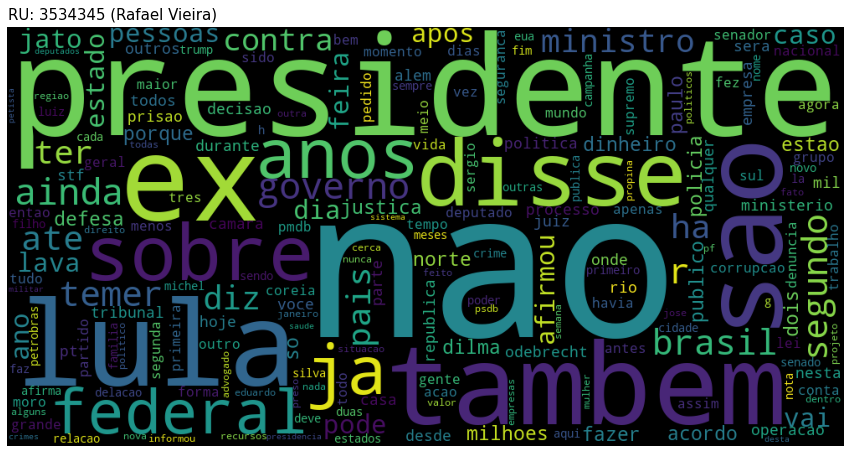

In [135]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

#### ‚òÅÔ∏è 4.2 -  Nuvem de Palavras no conjunto de dados POSITIVO (TRUE)

In [136]:
from collections import Counter
word_could_dict_posA=Counter(pos_A)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict_posA)

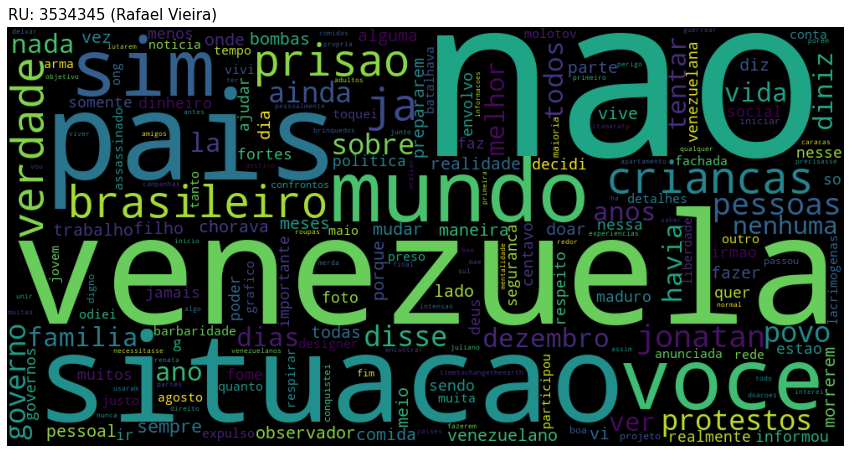

In [137]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

In [138]:
maiores_palavras_positivas = pd.DataFrame.from_dict(word_could_dict_posA, orient='index').sort_values(0, ascending=False)[:20]
maiores_palavras_positivas.head(4)

0
nao        32
venezuela  17
voce       10
pais       10

In [139]:
maiores_palavras_positivas.reset_index(inplace=True)

In [140]:
maiores_palavras_positivas.head(3)

index   0
0        nao  32
1  venezuela  17
2       voce  10

#### üìà 4.3 -Distribui√ß√£o das 20 primeiras maiores palavras no conjunto de dados positivos?

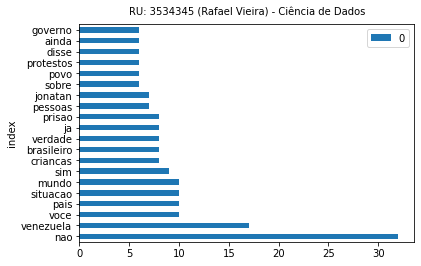

In [141]:
ax = maiores_palavras_positivas.plot.barh(x='index', y=0, rot=0)
plt.text(5, 20.4, 'RU: 3534345 (Rafael Vieira) - Ci√™ncia de Dados', fontsize=10, color='Black')
plt.show()

#### ‚òÅÔ∏è 4.3 -  Nuvem de Palavras no conjunto de dados NEGATIVOS (FAKE)

In [142]:
from collections import Counter
word_could_dict_NEG=Counter(pos_N)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict_NEG)

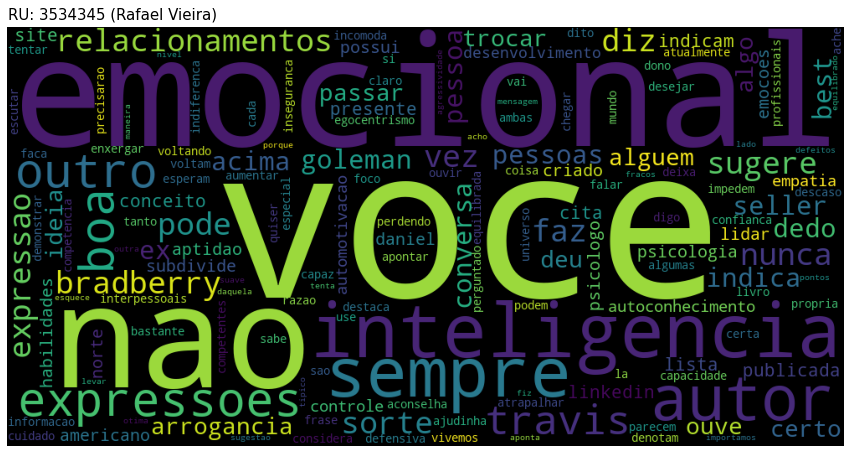

In [143]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

In [144]:
maiores_palavras_fakes = pd.DataFrame.from_dict(word_could_dict_NEG, orient='index').sort_values(0, ascending=False)[:20]
maiores_palavras_fakes.head(4)

0
voce          14
emocional      8
nao            7
inteligencia   6

In [145]:
maiores_palavras_fakes.reset_index(inplace=True)

#### üìà 4.3 -Distribui√ß√£o das 20 primeiras maiores palavras no conjunto de dados negativos (fake)?

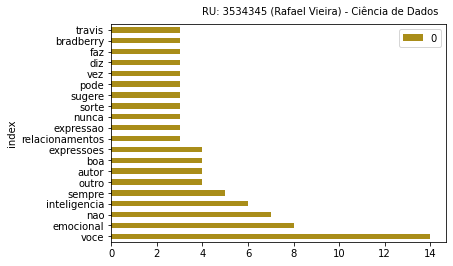

In [146]:
ax = maiores_palavras_fakes.plot.barh(x='index', y=0, rot=0, color = '#a98d19')
plt.text(4, 20.4, 'RU: 3534345 (Rafael Vieira) - Ci√™ncia de Dados', fontsize=10, color='Black')
plt.show()

### 5 - Abordagens TF-IDF

In [3]:
import pandas as pd
arquivo = pd.read_csv('arquivo_redes_neurais.csv')

In [4]:
# arquivo = pd.DataFrame(documents_clean)
arquivo.rename(columns = {'0': 'frases', '1': 'label'}, inplace=True)
pd.set_option('display.max_colwidth',None)
arquivo.head(1)

frases  \
0  podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado   

  label  
0   pos

In [5]:
len(arquivo)

7200

In [6]:
corpus = []
for i in arquivo['frases']:
    corpus.append(i)

In [7]:
len(corpus)

7200

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf=True, use_idf=True)

In [9]:
X = vectorizer.fit_transform(corpus)

In [10]:
names = vectorizer.get_feature_names()
# names

/Users/rafaelvieira/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### üîñ  5.1 - TF-IDF da colecao toda

In [11]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus)
df_doc = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_doc = df_doc.sort_values('TF-IDF', ascending=False)
df_doc.head(3)

TF-IDF
parlamentar  0.237852
legenda      0.205777
partido      0.195085

#### üîñ  5.2 - TF-IDF da classe positiva

In [12]:
positivo = arquivo.loc[arquivo['label']=='pos']
positivo.head(1)

frases  \
0  podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado   

  label  
0   pos

#### üîñ  5.3 - TF-IDF da colecao toda

In [13]:
corpus_positivo = []
for i in positivo['frases']:
    corpus_positivo.append(i)

In [14]:
len(corpus_positivo)

3600

In [15]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus_positivo)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
# print (df.head(25))

/Users/rafaelvieira/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# df.reset_index(inplace=True)
df[:3]

TF-IDF
parlamentar  0.236079
legenda      0.203731
gaguim       0.198798

In [17]:
!pip install plotly

#### üíπ 5.4 - Visualizacao das distribuicoes de TD-IDF nas 20 primeiras palavras de maiores scores (classe positiva)

In [19]:
df.head(3)

TF-IDF
parlamentar  0.236079
legenda      0.203731
gaguim       0.198798

In [33]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

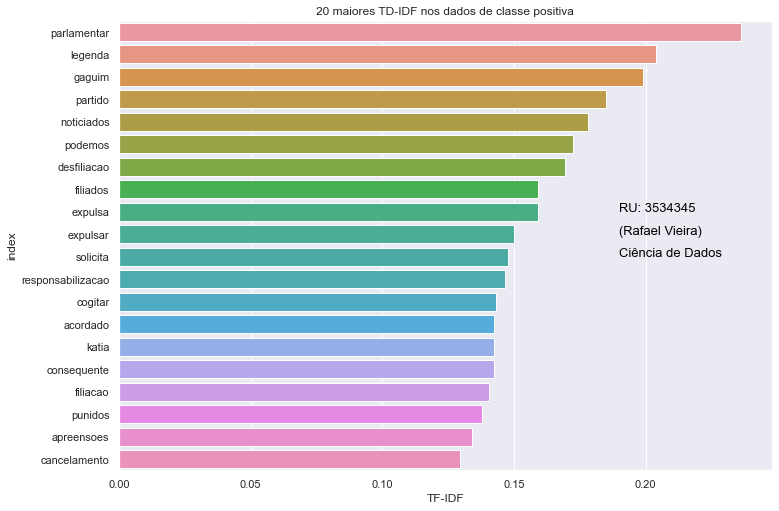

In [40]:
# plotando o mesmo gr√°fico, mas na horizontal para um melhor entendimento
import seaborn as sns
import matplotlib.pyplot as plt
# df.reset_index(inplace=True)
# from PIL import Image
sns.barplot(data=df[0:20], x='TF-IDF', y='index')
plt.text(0.19, 8, 'RU: 3534345', fontsize=13, color='Black')
plt.text(0.19, 9, '(Rafael Vieira)', fontsize=13, color='Black')
plt.text(0.19,10, 'Ci√™ncia de Dados', fontsize=13, color='Black')

plt.title('20 maiores TD-IDF nos dados de classe positiva')
plt.show()

#### 5.5 -  TF_IDF para as classes positivas e negativas

In [41]:
negativo = arquivo.loc[arquivo['label']!='pos']
negativo.head(2)

frases  \
3600                                                                                                                                                                                                                                                                                                                                                                                                                                                                katia abreu diz que vai colocar sua expulsao em uma moldura mas nao para de reclamar a senadora katia abreu sem partido to disse que sua expulsao do pmdb foi resultado de uma acao da cupula atual da legenda que segundo ela e oportunista amanha eu vou botar numa moldura dourada a minha expulsao porque das maos de onde veio e um atestado de boa conduta para o meu curriculo essas pessoas que me expulsaram nao servem ao pais eles se servem do pais em seus beneficios proprios disse katia abreu ue mas se a expulsao e algo tao bom para seu curriculo por que tanta choradeira katia sabemos o motivo provavelmente katia nao tem valor para o pt partido que ja deveria te la absorvido ao que parece o pt gostava de katia somente se ela ficasse entrincheirada dentro do pmdb ou seja isso e se rebaixar demais resta a katia ficar chorando as pitangas por todos os cantos em tempo ate o momento o pt nao cadastrou katia abreu em suas fileiras que situacao patetica para a ex ministra da agricultura de dilma   
3601  dr ray peita bolsonaro chama o de conservador fake em entrevista a danilo gentili e divide a direita este site vem avisando jair bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do brasil que querem se ver livres das amarras estatais tudo bem que as pesquisas ainda dizem que a maior parte do povo e contra as privatizacoes mas o indice pouco mais de do povo e facil de ser revertido ademais bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos recentemente ele disse que pensaria vezes antes de privatizar a petrobras para que ela nao caia nas maos de chineses ou algo do tipo deveria ter dito eu garanto a privatizacao da petrobras e tambem garanto que chineses nao irao compra la isso nao deixaria brechas do jeito que ele falou parece que o suposto medo de venda aos chineses e pretexto para evitar a privatizacao seja la como for a direita vai ter que adotar alternativas que foquem em um estado reduzido diminuicao de impostos e venda de estatais alem de joao amoedo dr rey esta fazendo vicejar este tipo de discurso e ainda que sua candidatura esteja em fase inicial e complicado para bolsonaro que aparecam pessoas de direita propondo uma visao economicamente direitista para a economia enfim veja aos dr rey espinafrando bolsonaro quem da brechas nao pode reclamar que os outros aproveitem nao e mesmo   

     label  
3600   neg  
3601   neg

In [42]:
corpus_fake = []
for i in negativo['frases']:
    corpus_fake.append(i)
    
# corpus_true = []
# for i in true['preprocessed_news']:
#     corpus_true.append(i)
    

In [43]:
##TD-IFD - true

In [47]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus_fake)
df2 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)
# print (df2.head(25))
df2[:3]

TF-IDF
katia     0.598953
expulsao  0.342676
abreu     0.260187

#### üíπ 5.5 - Visualizacao das distribuicoes de TD-IDF nas 20 primeiras palavras de maiores scores (classe negativa)

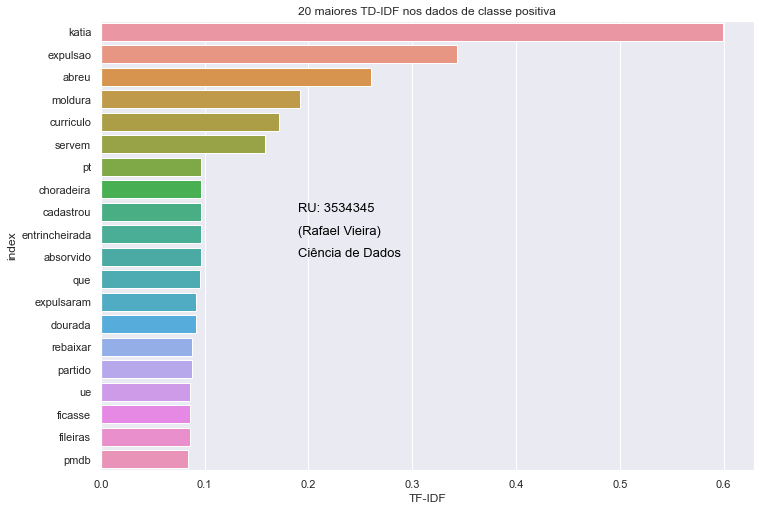

In [49]:
# plotando o mesmo gr√°fico, mas na horizontal para um melhor entendimento
import seaborn as sns
import matplotlib.pyplot as plt
df2.reset_index(inplace=True)
# from PIL import Image
sns.barplot(data=df2[0:20], x='TF-IDF', y='index')
plt.text(0.19, 8, 'RU: 3534345', fontsize=13, color='Black')
plt.text(0.19, 9, '(Rafael Vieira)', fontsize=13, color='Black')
plt.text(0.19,10, 'Ci√™ncia de Dados', fontsize=13, color='Black')

plt.title('20 maiores TD-IDF nos dados de classe positiva')
plt.show()

### üß†ü§ñ 6 - Cria√ß√£o do modelo de classifica√ß√£o - Usando redes neurais artificiais

In [177]:
arquivo.head(1)

0  \
0  podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado   

     1  
0  pos

#### üìå 6.1 - Tokeniza√ß√£o das palavras

In [181]:
# Tokenizando as 3000 palavras mais frequentes:
from keras.preprocessing.text import Tokenizer
tokenizador = Tokenizer(num_words=3000) # se n√£o informar num_words, ele ir√° considerar todas
tokenizador.fit_on_texts(arquivo['0'].values)

In [1]:
# Visualizando as palavras mais frequentes
# print(tokenizador.word_index)

In [183]:
# O tokenizador foi criado, mas at√© aqui nosso dataset ainda n√£o mudou. Iremos criar uma vari√°vel X com as palavras tokenizadas:
X = tokenizador.texts_to_sequences(arquivo['0'].values)

In [184]:
# X[2] # Observe como o texto do √≠ndice 2 possui 15 palavras

In [185]:
# Verificando o tamanho do texto mais longo:
maximo_comprimento = max(len(i) for i in X)
print(maximo_comprimento)

5659


In [186]:
from keras_preprocessing.sequence import pad_sequences

# Criando lotes de dados temporais, fazendo com que cada amostra tenha o mesmo tamanho:
X = pad_sequences(X)

In [187]:
X[2]

array([  0,   0,   0, ..., 112,   1, 230])

In [188]:
len(X[1])

5659

#### üññ 6.2 - Separa√ß√£o entre treino e test

In [189]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(arquivo['1']).values # Aplicando one-hot-encoding na vari√°vel target 
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, test_size = 0.25)
print('Tamanho do treino: ', x_treino.shape, y_treino.shape)
print('Tamanho do teste: ', x_teste.shape, y_teste.shape)

Tamanho do treino:  (5400, 5659) (5400, 2)
Tamanho do teste:  (1800, 5659) (1800, 2)


In [190]:
X.shape[1]

5659

In [191]:
import warnings
warnings.filterwarnings('ignore')

#### üóÇÔ∏è 6.3 - Arquitetura proposta para rede neural

In [195]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import warnings
warnings.filterwarnings('ignore')

# Criando a rede neural temporal:

modelo = Sequential()
modelo.add(Embedding(input_dim=600, output_dim=100, input_length = X.shape[1])) # criando os vetores word embedding. Lembrando que X.shape[1] √© o n√∫mero de palavras que cada amostra tem (907).
modelo.add(LSTM(150, dropout=0.3)) # criando a LSTM (150 neur√¥nios na camada oculta)
modelo.add(Dense(2, activation='softmax')) # definindo a sa√≠da com 2 classes
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 6.4 - Sumariza√ß√£o do modelo utilizado.

In [203]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5659, 100)         60000     
_________________________________________________________________
lstm (LSTM)                  (None, 150)               150600    
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 210,902
Trainable params: 210,902
Non-trainable params: 0
_________________________________________________________________


<table align="left" class='dashed-box'>
<td>üö®</td>
    <td>A REDE NEURAL IR√Å UTILIZAR <b>210.902</b> PAR√ÇMETROS NO TREINAMENTO
</td>
</table>

#### 6.5 - Desempenho da rede neural

In [196]:
import tensorflow as tf
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [197]:
historico=modelo.fit(x_treino, y_treino, batch_size = 50, epochs = 200, validation_data=(x_teste, y_teste), callbacks=[early_stopping_cb],
                    use_multiprocessing=True, workers=16, max_queue_size=32, verbose =2)

Epoch 1/200
108/108 - 48s - loss: 0.6737 - accuracy: 0.5930 - val_loss: 0.6483 - val_accuracy: 0.6278
Epoch 2/200
108/108 - 44s - loss: 0.5168 - accuracy: 0.7504 - val_loss: 0.3636 - val_accuracy: 0.8972
Epoch 3/200
108/108 - 45s - loss: 0.6186 - accuracy: 0.6487 - val_loss: 0.5976 - val_accuracy: 0.6783
Epoch 4/200
108/108 - 45s - loss: 0.5563 - accuracy: 0.7117 - val_loss: 0.5487 - val_accuracy: 0.6394
Epoch 5/200
108/108 - 47s - loss: 0.5486 - accuracy: 0.7033 - val_loss: 0.5642 - val_accuracy: 0.7311
Epoch 6/200
108/108 - 45s - loss: 0.2107 - accuracy: 0.9319 - val_loss: 0.1419 - val_accuracy: 0.9594
Epoch 7/200
108/108 - 45s - loss: 0.1162 - accuracy: 0.9635 - val_loss: 0.1399 - val_accuracy: 0.9567
Epoch 8/200
108/108 - 45s - loss: 0.1032 - accuracy: 0.9654 - val_loss: 0.1618 - val_accuracy: 0.9489
Epoch 9/200
108/108 - 44s - loss: 0.0863 - accuracy: 0.9689 - val_loss: 0.1337 - val_accuracy: 0.9594
Epoch 10/200
108/108 - 45s - loss: 0.0878 - accuracy: 0.9689 - val_loss: 0.1357 - 

### Acur√°cia:
<table align="left" class='dashed-box'>
<td>üìå </td>
    <td>O ACUR√ÅCIA NO CONJUNTO DE TREINAMENTO FOI DE:  <span style='font-size: 1.6em'><b>0.9863 <b></span>
</td>
</table>


In [17]:
# Treinando o modelo:
# modelo.fit(x_treino, y_treino, batch_size = 50, epochs = 10, verbose = 2)

In [198]:
y_teste

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [199]:
# Testando a performance do modelo nos dados de teste:
__, acuracia = modelo.evaluate(x_teste, y_teste, verbose = 2, batch_size = 50)
print("Acur√°ria com dados de teste: %.2f" % (acuracia))

36/36 - 6s - loss: 0.1292 - accuracy: 0.9589
Acur√°ria com dados de teste: 0.96


        
### Acur√°cia teste:
<table align="left" class='dashed-box'>
<td>üìå </td>
    <td>O ACUR√ÅCIA NO CONJUNTO DE TREINAMENTO FOI DE:  <span style='font-size: 1.6em'><b>0.96 <b></span>
</td>
</table>

### üìàüìà 7 - Visualiza√ß√£o gr√°fica do desempenho do modelo

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

history = pd.DataFrame(historico.history)

In [201]:
# history

Text(0, 0.5, 'Accuracy')

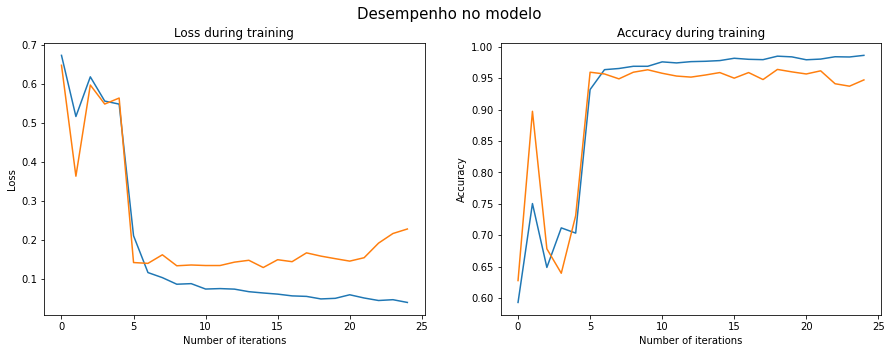

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Desempenho no modelo', size=15)

axes[0].plot(history[['loss', 'val_loss']])
axes[0].set_title("Loss during training")
axes[0].set_xlabel("Number of iterations")
axes[0].set_ylabel("Loss")

axes[1].plot(history[['accuracy', 'val_accuracy']])
axes[1].set_title("Accuracy during training")
axes[1].set_xlabel("Number of iterations")
axes[1].set_ylabel("Accuracy")

##### 7.1 - Salvando a arquitetura do modelo

In [219]:
tf.keras.utils.plot_model(
    modelo,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Considera√ß√µes finais... üïµüèªüïµüèªüïµüèª

Utilizando uma arquitetura de rede neural LSTM foi poss√≠vel construir um modelo que com alta acur√°cia para classifica√ß√£o de not√≠cias, reconhecendo padr√µes em not√≠cias reais e not√≠cias fake. 
Essa classifica√ß√£o assertiva s√≥ foi poss√≠vel por conta de um pr√©-tratamento dos textos, retirando palavras e caracteres inconsistentes e permitindo que a rede aprendesse, de maneira r√°pida, a efetuar com 98% de acur√°cia a corpora estudada.